#  Objective: To identify the best sectors, countries, and a suitable investment type for making investments.
criterion:
* Funding Type Analysis: Among following four funding types viz.venture, angel, seed, and private equity, which is best suited if Spark Funds wants to invest between 5 to 15 million USD per investment round.
* Country analysis: For the chosen investment type,selsect top 3 english speaking countries with the highest amount of funding received for the chosen investment type.
* Sector analysis: Find out most heavily invested main sectors from original 8 main sectors, in each of the three countries (for decided funding type and investments range of 5-15 M USD).
* Visualization : visualizing the results with plots


In [1]:
#importing liabraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns

# CheckPoint 1 : Data sourcing
### Reading 'companies' and 'rounds2' csv files:
* data is originally sourced from crunchbase.com and provided in three CSV files namely 'companies','rounds2' and 'mapping'
* As file contains non english characters such as latin, we need to pass correcet encoding format while reading these csv files.
* Simply reading these files with encoding 'ISO-8859-1' or 'UTF-8' without additional coding to handle non-english characters will result in invalid values. 
* For given files, it is observed that reading with encoding 'ANSI' is able to handle non-english characters as well. 

In [2]:
companies = pd.read_csv(r'Downloads\companies.csv',encoding = "ANSI",parse_dates=True)
print("Shape of 'companies' dataframe is: ",companies.shape)
companies.head()

Shape of 'companies' dataframe is:  (66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2 = pd.read_csv(r'Downloads\rounds2.csv',encoding = "ANSI",parse_dates=True)
print("Shape of 'rounds2' dataframe is: ",rounds2.shape)
rounds2.head()


Shape of 'rounds2' dataframe is:  (114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### How many unique companies are present in rounds2?
* As 'company_permalink' column values represents Unique ID of company, it can be used to identify number of unique companies present in rounds2.

In [4]:
#checking for null values in 'company_permalink' column : 
rounds2.company_permalink.isnull().sum()

0

In [5]:
#As there are no null values in this column we can proceed to analyse this column.
#convering 'company_permalink' column values to lower case and removing any left and right spaces if present.
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.lower().rstrip().lstrip())
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
print('number of unique companies present in rounds2 dataframe are: ', rounds2.company_permalink.nunique())

number of unique companies present in rounds2 dataframe are:  66368


#### How many unique companies are present in companies?
* As 'permalink' column values represents Unique ID of company, it can be used to identify number of unique companies present in companies dataframe.

In [7]:
#checking for null values in 'permalink' column : 
companies.permalink.isnull().sum()

0

In [8]:
#As there are no null values in this column we can proceed to analyse this column.
#convering 'permalink' column values to lower case and removing any left and right spaces if present.
companies['permalink'] = companies['permalink'].apply(lambda x:x.lower().rstrip().lstrip())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
print('number of unique companies present in companies dataframe are: ', companies.permalink.nunique())

number of unique companies present in companies dataframe are:  66368


#### In the companies data frame, 'permalink' column can be used as the  unique key for each company as it represents Unique ID of company

In [10]:
#Finding companies in the rounds2 file which are not present in companies :
#We can acheive above goal using set difference opeartion, hence converting into sets.
rounds2_set = set(rounds2.company_permalink.unique())
companies_set = set(companies.permalink.unique())

In [11]:
""" difference of set 'companies_set' from set 'rounds2_set' i.e (rounds2_set - companies_set) is 
    set of companies which are in the rounds2 file but are not present in companies """

print("Set of companies in the 'rounds2' file which are not present in 'companies' :", 
      rounds2_set.difference(companies_set))


Set of companies in the 'rounds2' file which are not present in 'companies' : set()


#### Above empty set indicates that there are no companies in the rounds2 file which are not present in companies i.e all companies in the rounds2 file are present in companies.

In [12]:
#Merging the two data frames so that all columns in the companies frame are added to rounds2 data frame.
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='left')
print('Number of observations present in merged master_frame are: ', len(master_frame.index))

Number of observations present in merged master_frame are:  114949


In [13]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


# Data cleaning 
### Handling missing values and removing unwanted variables:

In [14]:
"""Now we can start handling missing values"""
# Checking for non-null values:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [15]:
# Number of missing values in each column:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [16]:
# Percentage of missing values in each column:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [17]:
"""As per our objective, variables/columns 'funding_round_permalink','funded_at','homepage_url','state_code',
   'region','city','founded_at' are not so useful in analysis. We can either drop them entirely or let them 
   be and ignore it, even if they contain missing values"""

#We can also drop 'permalink' column, since 'permalink' and 'company_permalink' are dupliates.
#We can also drop 'funding_round_code' column as majority of the data is missing.
master_frame = master_frame.drop(['funding_round_permalink','funded_at','homepage_url','state_code',
                               'region','city','founded_at','permalink','funding_round_code'],axis=1)

In [18]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN


In [19]:
# Percentage of missing values in each column:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
status                 0.00
country_code           7.55
dtype: float64

In [20]:
# Handling missing values in 'country_code' and 'category_list' columns :

In [21]:
# Frequency of values of categorical variable 'country_code':
master_frame.country_code.value_counts().head()

USA    72308
GBR     5966
CAN     3115
CHN     2693
IND     2233
Name: country_code, dtype: int64

In [22]:
# Frequency of values of categorical variable 'category_list':
master_frame.category_list.value_counts().head()

Biotechnology       8165
Software            6616
Health Care         2239
Clean Technology    2172
E-Commerce          2167
Name: category_list, dtype: int64

In [23]:
# From above two ouputs, we can see that most occuring country is "USA" and most occuring category list is 'Biotechnology'.

""" As the percentage of missing values is low in 'category_list' and 'country_code' columnns, we can 
    simply drop them rather than introducing a bias when imputing with most frequently occuring""" 

#dropping rows with missing values that are present in 'category_list' and 'country_code' columnns:
master_frame = master_frame[~(master_frame.category_list.isnull() | master_frame.country_code.isnull())]

In [24]:
""" Handling missing values in 'raised_amount_usd' column : """
# Stat values for numeric variable 'raised_amount_usd':
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

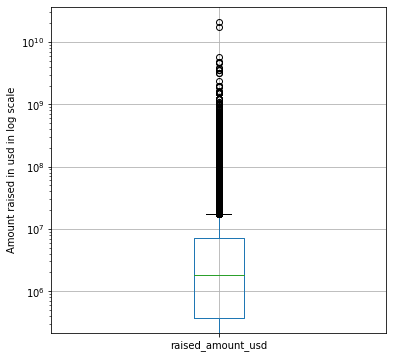

In [25]:
master_frame.boxplot(figsize=[6,6])
plt.yscale('log')
plt.ylabel('Amount raised in usd in log scale')
plt.show()

In [26]:
"""As we can see that mean=1,03,16,890 usd and median=15,00,000 usd. There is large variation 
   in mean and median indicating presence of outliers. We can either impute null values in 'raised_amount_usd'
   column by a statistical value(here median would be better choice than mean) or simply discard the
   null values to avoid introduction of bias"""
'''We will be dropping the rows with null value here, since there is large variance in datadet and imputing 
   even with median may cause bias. Also, even after dropping rows with the missing values we still have
   significant amount of data to work with so droping seems more suitable'''

#dropping rows with the missing values in column 'raised_amount_usd':
master_frame = master_frame.dropna(subset=['raised_amount_usd'])

In [27]:
# Checking percentage of missing values in each column:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

In [28]:
# Percentage of observations remaining after cleaning the missing data :
# initially we had 114949 rows
preserved = round(100*len(master_frame.index)/114949,2)
print('% of observations preserved after cleaning dataset:  ',preserved)

% of observations preserved after cleaning dataset:   77.02


In [29]:
# We still have significant amount of data to work with even after cleaning missing values"""

# CheckPoint 2 : Funding Type Analysis 
### constraints:
* Spark Funds wants to choose from one of following four investment types viz. venture, angel, seed, and private equity
* Based on the most representative investment amount, one of the investment types will be chosen.
* Spark Funds wants to invest between 5 to 15 million USD per investment round

In [30]:
# Filtering data for four investment types viz. venture, angel, seed, and private equity :
master_frame = master_frame[(master_frame.funding_round_type == 'venture') | 
                            (master_frame.funding_round_type == 'angel') |
                           (master_frame.funding_round_type == 'seed') |
                           (master_frame.funding_round_type == 'private_equity')]
# converting 'raised_amount_usd' values in million USDs for ease :
master_frame['raised_amount_usd_millions'] = master_frame['raised_amount_usd']/1000000
# dropping original column:
master_frame = master_frame.drop('raised_amount_usd',axis=1)
# creating copy for future analysis
master_frame_copy = deepcopy(master_frame)

In [31]:
master_frame.head(5)

,company_permalink,funding_round_type,name,category_list,status,country_code,raised_amount_usd_millions
0,/organization/-fame,venture,#fame,Media,operating,IND,10.000000
2,/organization/-qounter,seed,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,0.700000
4,/organization/0-6-com,venture,0-6.com,Curated Web,operating,CHN,2.000000
7,/organization/0ndine-biomedical-inc,seed,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.043360
8,/organization/0ndine-biomedical-inc,venture,Ondine Biomedical Inc.,Biotechnology,operating,CAN,0.719491


In [32]:
# Checking stat values of raised_amount_usd_millions for each investment types
master_frame.groupby('funding_round_type')['raised_amount_usd_millions'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,0.971574,7.710904,0.0,0.152756,0.414906,1.000000,494.511992
private_equity,1820.0,73.938486,201.776467,0.0,5.000000,20.000000,75.762572,4745.460219
seed,21095.0,0.747794,2.288318,0.0,0.068817,0.300000,1.000000,200.000000
venture,47809.0,11.724223,88.215714,0.0,1.600000,5.000000,12.000000,17600.000000


In [33]:
""" We will consider median as true representative as it is not affected by outliers."""
print('Representative funding amount in units of million usd for each type is as follow: ')
print(master_frame.groupby('funding_round_type')['raised_amount_usd_millions'].median())

Representative funding amount in units of million usd for each type is as follow: 
funding_round_type
angel              0.414906
private_equity    20.000000
seed               0.300000
venture            5.000000
Name: raised_amount_usd_millions, dtype: float64


#### Link to plot1

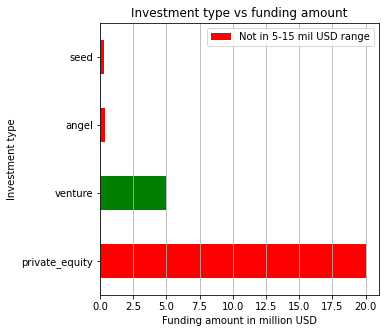

In [34]:
# Preparing data to plot
bar_plot=master_frame.groupby('funding_round_type')['raised_amount_usd_millions'].median().sort_values(ascending=False)
bar_plot = pd.DataFrame(bar_plot)
# Plotting the results
bar_plot.plot.barh(figsize=[5,5],color=[np.where(bar_plot["raised_amount_usd_millions"].between(5,15), 'g', 'r')])
plt.grid(axis='x')
plt.ylabel('Investment type')
plt.xlabel('Funding amount in million USD')
plt.legend(['Not in 5-15 mil USD range'],loc='best')
plt.title('Investment type vs funding amount')
plt.show()

#### From above output we can say that venture type will be most suitable,considering the fact that Spark Funds wants to invest between 5 to 15 million USD per investment round.

In [35]:
# Filtering the data for selected investment type i.e for venture :
master_frame = master_frame[master_frame.funding_round_type=='venture']
master_frame.sample(5)

,company_permalink,funding_round_type,name,category_list,status,country_code,raised_amount_usd_millions
89119,/organization/shoulder-options,venture,Shoulder Options,Hardware + Software,operating,USA,0.500000
113117,/organization/youappi,venture,YouAppi,Advertising|Android|Apps|Artificial Intelligen...,operating,USA,3.000000
5678,/organization/anda-networks,venture,ANDA Networks,Mobile,operating,USA,10.500000
49713,/organization/invuity,venture,Invuity,Health Care,ipo,USA,13.200000
68834,/organization/novitaz,venture,Novitaz,Enterprise Software,operating,USA,1.381973


# CheckPoint 3 : Country Analysis
### criterion:
* Spark Funds wants to see the top nine countries which have received the highest total funding.
* From these 9 countries choose top three English-speaking countries.

In [36]:
# Inspecting values of country_code :
master_frame.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

In [37]:
# From above output we can see that country_code column values are proper thus we can proceed ahead.
# Grouping top 9 countries which have received the highest total funding 
# and also arranging them in descending order based on total funding value:
top9=master_frame.pivot_table('raised_amount_usd_millions',index='country_code',aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                                           ascending=False).iloc[:9]
print(top9)

              raised_amount_usd_millions
country_code                            
USA                        420068.029342
CHN                         39338.918773
GBR                         20072.813004
IND                         14261.508718
CAN                          9482.217668
FRA                          7226.851352
ISR                          6854.350477
DEU                          6306.921981
JPN                          3167.647127


#### Link to plot 2

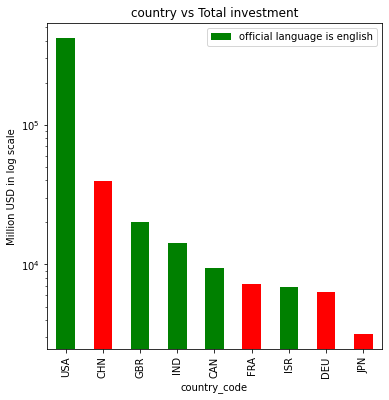

In [38]:
# Preparing data for plotting
top9['official_English'] = np.array([True,False,True,True,True,False,True,False,False])
# Plotting the result :
top9.plot.bar(figsize=[6,6],color=[np.where(top9["official_English"]==True, 'g', 'r')])
plt.yscale('log')
plt.ylabel('Million USD in log scale')
plt.legend(['official language is english'])
plt.title('country vs Total investment')
plt.show()

#### As company wants to consider only english speaking countries, we will consider top 3 invested english speaking countires as United states(USA),United Kingdom(GBR) and India(IND).

In [39]:
# Filtering dataframe for above three selected countries:
master_frame = master_frame[(master_frame.country_code=='USA') |
                            (master_frame.country_code=='GBR') |
                            (master_frame.country_code=='IND')  ]
master_frame.head()

,company_permalink,funding_round_type,name,category_list,status,country_code,raised_amount_usd_millions
0,/organization/-fame,venture,#fame,Media,operating,IND,10.0
10,/organization/0xdata,venture,H2O.ai,Analytics,operating,USA,20.0
11,/organization/0xdata,venture,H2O.ai,Analytics,operating,USA,1.7
12,/organization/0xdata,venture,H2O.ai,Analytics,operating,USA,8.9
22,/organization/1-mainstream,venture,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,5.0


# CheckPoint 4 : Sector Analysis part 1
*  Extract primary sector for each observation based on category list.Business rule given is that the first string before the vertical bar will be considered the primary sector.
*  Map each primary sector to one of the eight main sectors.

In [40]:
# Extracting primary sector :
master_frame['primary_sector']=master_frame['category_list'].apply(lambda x:x.split('|')[0].lower())
# Standardizing the text case :
master_frame['primary_sector']=master_frame['primary_sector'].str.lower()

In [41]:
# Reading mapping file
mapping = pd.read_csv(r'Downloads\mapping.csv')
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [42]:
# Dropping rows with missing values in 'category_list' column as a data cleaning process:
mapping = mapping[~(mapping.category_list.isnull())]
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [43]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [44]:
""" 'Category_list' key in 'mapping' dataframe will be used as common key for merging with master_frame """
# Checking values of category_list before merging:
set(mapping.category_list.unique()).symmetric_difference(set(master_frame.primary_sector.unique()))

{'all students',
 '0tural Language Processing',
 'computer vision',
 'DOD/Military',
 'trading',
 'Funeral Industry',
 'Computers',
 'translation',
 '3d printing',
 'recycling',
 'Rental Housing',
 'engineering firms',
 'price comparison',
 'Email',
 'New Technologies',
 'Online Rental',
 'communications infrastructure',
 'Drones',
 'enterprise software',
 'ipad',
 'public relations',
 'Travel & Tourism',
 'Oil',
 'indoor positioning',
 'restaurants',
 'Corporate Wellness',
 'Green',
 'Physical Security',
 'video',
 'Human Computer Interaction',
 'collaborative consumption',
 'Enterprise Software',
 'high tech',
 'CAD',
 'social fundraising',
 'Enterprise Application',
 'Marketing Automation',
 'Delivery',
 'Flowers',
 '3d technology',
 'Cosmetics',
 'supply chain management',
 'Environmental Innovation',
 'media',
 'batteries',
 'fintech',
 'Beauty',
 'Flash Storage',
 'Sales and Marketing',
 'Training',
 'linux',
 'Gadget',
 'Veteri0ry',
 'water',
 'debt collecting',
 '3D Technology'

In [45]:
"""There are certain values where 'na' is replaced by '0'. e.g. Analytics is present as A0lytics. 
Also,we have to take care not to replace any value where '0'char is genuinely present eg.'enterprise 2.0'"""
# Converting values to lower case : 
mapping['category_list']=mapping['category_list'].map(lambda x:str(x).lower())
# Replacing '0' by 'na' without modifying 'enterprise 2.0' :
mapping['category_list']=mapping['category_list'].apply(lambda x:'enterprise 2.0' if (x =='enterprise 2.0') 
                                                                                  else x.replace('0','na'))

In [46]:
# Converting mapping dataframe from wide format to long format for merging operation :
mapping=mapping.set_index('category_list')
mapping=mapping.stack()
mapping=mapping.reset_index()

#We can do the same thing by pd.melt()

In [47]:
'''Checking if wide to long conversion is successful:
   Total rows in long DF=(total rows in wide DF)*(number of columns other than category_list in wide DF) 
                     = 687 * 9 
                     = 6183                                          '''
print('shape of mapping dataframe is: ',mapping.shape)
print('\n',mapping.head())
#Thus from output we can say that DF has been converted from wide to long format.

shape of mapping dataframe is:  (6183, 3)

   category_list                     level_1  0
0            3d         Automotive & Sports  0
1            3d                      Blanks  0
2            3d  Cleantech / Semiconductors  0
3            3d               Entertainment  0
4            3d                      Health  0


In [48]:
# Renaming columns: 
mapping.columns = ['category_list','main_sector','data_values']

In [49]:
mapping.head()

,category_list,main_sector,data_values
0,3d,Automotive & Sports,0
1,3d,Blanks,0
2,3d,Cleantech / Semiconductors,0
3,3d,Entertainment,0
4,3d,Health,0


In [50]:
# filtering out rows which dont have genuine main sector i.e. rows with data values=0:
mapping = mapping[mapping['data_values']!=0]
# Deleting 'data_values' column:
del mapping['data_values']
mapping.shape

(687, 2)

In [51]:
# Checking if there are any values of 'primary_sector' that are present in master frame but not in 'category_list' of mapping file 
set(master_frame.primary_sector.unique()).difference(set(mapping.category_list.unique()))

{'adaptive equipment',
 'biotechnology and semiconductor',
 'greentech',
 'natural gas uses',
 'product search',
 'racing',
 'rapidly expanding',
 'retirement',
 'specialty retail'}

In [52]:
# From above we can see that some values of 'primary_sector' in master frame are not present in 'category_list' of mapping file
# Hence Inner-joining master_frame and mapping dataframes to avoid addition of missing values to data frame.
master_frame= pd.merge(master_frame,mapping,left_on='primary_sector',right_on='category_list',how='inner')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38792 entries, 0 to 38791
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_permalink           38792 non-null  object 
 1   funding_round_type          38792 non-null  object 
 2   name                        38792 non-null  object 
 3   category_list_x             38792 non-null  object 
 4   status                      38792 non-null  object 
 5   country_code                38792 non-null  object 
 6   raised_amount_usd_millions  38792 non-null  float64
 7   primary_sector              38792 non-null  object 
 8   category_list_y             38792 non-null  object 
 9   main_sector                 38792 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [53]:
# Removing unwanted and duplicate columns
master_frame=master_frame.drop(['category_list_x','category_list_y'],axis=1)
master_frame.head()

,company_permalink,funding_round_type,name,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
0,/organization/-fame,venture,#fame,operating,IND,10.0,media,Entertainment
1,/organization/90min,venture,90min,operating,GBR,15.0,media,Entertainment
2,/organization/90min,venture,90min,operating,GBR,5.8,media,Entertainment
3,/organization/90min,venture,90min,operating,GBR,18.0,media,Entertainment
4,/organization/all-def-digital,venture,All Def Digital,operating,USA,5.0,media,Entertainment


# CheckPoint 5 : Sector Analysis part 2
* Aim is to find out the most heavily invested main sectors in each of the three countries (for funding type venture and investments range of 5-15 M USD).

In [54]:
'''Creating Dataframes D1,D2,D3 for USA,United Kingdom and India respectively, containing the observations 
   of funding type venture and falling within the 5-15 million USD range.                              '''

D1 = master_frame[(master_frame.country_code =='USA') & (master_frame['raised_amount_usd_millions'].between(5,15))]
D1.sample(7)

,company_permalink,funding_round_type,name,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
111,/organization/app-annie,venture,App Annie,operating,USA,6.00,analytics,"Social, Finance, Analytics, Advertising"
26941,/organization/identity-engines,venture,Identity Engines,operating,USA,8.70,security,Others
16631,/organization/grab-networks,venture,Grab Media,acquired,USA,10.50,advertising,"Social, Finance, Analytics, Advertising"
26644,/organization/strongloop,venture,StrongLoop,acquired,USA,8.00,consulting,"Social, Finance, Analytics, Advertising"
33930,/organization/shenandoah-growers,venture,Shenandoah Growers,operating,USA,8.00,retail,"Social, Finance, Analytics, Advertising"
35835,/organization/soundbite-communication,venture,SoundBite Communications,acquired,USA,8.50,app marketing,"News, Search and Messaging"
19485,/organization/bodymedia,venture,BodyMedia,acquired,USA,6.05,health and wellness,Health


In [55]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063 entries, 4 to 38785
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_permalink           12063 non-null  object 
 1   funding_round_type          12063 non-null  object 
 2   name                        12063 non-null  object 
 3   status                      12063 non-null  object 
 4   country_code                12063 non-null  object 
 5   raised_amount_usd_millions  12063 non-null  float64
 6   primary_sector              12063 non-null  object 
 7   main_sector                 12063 non-null  object 
dtypes: float64(1), object(7)
memory usage: 848.2+ KB


In [56]:
D2 = master_frame[(master_frame.country_code =='GBR') & (master_frame['raised_amount_usd_millions'].between(5,15))]
D2.sample(6)

,company_permalink,funding_round_type,name,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
31634,/organization/xmos,venture,XMOS,operating,GBR,14.000000,semiconductors,Cleantech / Semiconductors
15257,/organization/tigerspike,venture,Tigerspike,operating,GBR,11.000000,enterprise software,Others
10300,/organization/exco-intouch,venture,Exco InTouch,operating,GBR,5.000000,biotechnology,Cleantech / Semiconductors
22430,/organization/medaphor,venture,MedaPhor,operating,GBR,7.859531,edtech,Others
14785,/organization/newvoicemedia,venture,NewVoiceMedia,operating,GBR,6.300000,enterprise software,Others
28788,/organization/trutap,venture,Trutap,closed,GBR,6.500000,mobile,"News, Search and Messaging"


In [57]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 1 to 38780
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_permalink           621 non-null    object 
 1   funding_round_type          621 non-null    object 
 2   name                        621 non-null    object 
 3   status                      621 non-null    object 
 4   country_code                621 non-null    object 
 5   raised_amount_usd_millions  621 non-null    float64
 6   primary_sector              621 non-null    object 
 7   main_sector                 621 non-null    object 
dtypes: float64(1), object(7)
memory usage: 43.7+ KB


In [58]:
D3 = master_frame[(master_frame.country_code =='IND') & (master_frame['raised_amount_usd_millions'].between(5,15))]
D3.sample(6)

,company_permalink,funding_round_type,name,status,country_code,raised_amount_usd_millions,primary_sector,main_sector
22553,/organization/iyogi,venture,iYogi,operating,IND,15.0,computers,Manufacturing
37354,/organization/zopnow,venture,ZopNow,operating,IND,10.0,groceries,Manufacturing
24666,/organization/letsbuy-com,venture,LetsBuy.com,acquired,IND,6.0,consumer electronics,Manufacturing
22007,/organization/grameen-financial-services,venture,Grameen Financial Services,operating,IND,13.5,finance,"Social, Finance, Analytics, Advertising"
23426,/organization/electronic-payment-and-services,venture,Electronic Payment and Services (EPS),operating,IND,5.0,hardware + software,Manufacturing
2739,/organization/quikr-india,venture,Quikr,operating,IND,6.0,curated web,"News, Search and Messaging"


In [59]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 38561
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_permalink           328 non-null    object 
 1   funding_round_type          328 non-null    object 
 2   name                        328 non-null    object 
 3   status                      328 non-null    object 
 4   country_code                328 non-null    object 
 5   raised_amount_usd_millions  328 non-null    float64
 6   primary_sector              328 non-null    object 
 7   main_sector                 328 non-null    object 
dtypes: float64(1), object(7)
memory usage: 23.1+ KB


##### Total number of Investments (countwise and sumwise) for USA:

In [60]:
# Grouping the data :
D1_pivot=D1.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')
print(f'Total Investments for USA, countwise is {D1_pivot.iloc[8,0]} and Sumwise is {D1_pivot.iloc[8,1]} million USD')
D1.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')

Total Investments for USA, countwise is 12063 and Sumwise is 107757.09729399999 million USD


,count,sum
,raised_amount_usd_millions,raised_amount_usd_millions
main_sector,,
Automotive & Sports,167,1454.104361
Cleantech / Semiconductors,2350,21633.430822
Entertainment,591,5099.197982
Health,909,8211.859357
Manufacturing,799,7258.553378
"News, Search and Messaging",1583,13971.567428
Others,2950,26321.007002
"Social, Finance, Analytics, Advertising",2714,23807.376964


##### Total number of Investments (countwise and sumwise) for United Kingdom:

In [61]:
# Grouping the data :
D2_pivot=D2.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')
print(f'Total Investments for United Kingdom, countwise is {D2_pivot.iloc[8,0]} and Sumwise is {D2_pivot.iloc[8,1]} million USD')
D2.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')

Total Investments for United Kingdom, countwise is 621 and Sumwise is 5379.078691 million USD


,count,sum
,raised_amount_usd_millions,raised_amount_usd_millions
main_sector,,
Automotive & Sports,16,167.051565
Cleantech / Semiconductors,130,1163.990056
Entertainment,56,482.784687
Health,24,214.537510
Manufacturing,42,361.940335
"News, Search and Messaging",73,615.746235
Others,147,1283.624289
"Social, Finance, Analytics, Advertising",133,1089.404014


##### Total number of Investments (countwise and sumwise) for India:

In [62]:
# Grouping the data :
D3_pivot=D3.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')
print(f'Total Investments for India, countwise is {D3_pivot.iloc[8,0]} and Sumwise is {D3_pivot.iloc[8,1]} million USD')
D3.pivot_table(values='raised_amount_usd_millions',index='main_sector',aggfunc=['count','sum'],margins=True,margins_name='grand_Total')

Total Investments for India, countwise is 328 and Sumwise is 2949.5436019999997 million USD


,count,sum
,raised_amount_usd_millions,raised_amount_usd_millions
main_sector,,
Automotive & Sports,13,136.900000
Cleantech / Semiconductors,20,165.380000
Entertainment,33,280.830000
Health,19,167.740000
Manufacturing,21,200.900000
"News, Search and Messaging",52,433.834545
Others,110,1013.409507
"Social, Finance, Analytics, Advertising",60,550.549550


#### Top,second and third Sector name (no. of investment-wise) for USA:

In [63]:
D1_group = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False))
D1_group=D1_group.reset_index()
print(f'For USA, no. of investment-wise Top Sector is {D1_group.iloc[0,0]} and no. of investments are {D1_group.iloc[0,1]}')
print(f'For USA, no. of investment-wise second Sector is {D1_group.iloc[1,0]} and no. of investments are {D1_group.iloc[1,1]}')
print(f'For USA, no. of investment-wise third Sector is {D1_group.iloc[2,0]} and no. of investments are {D1_group.iloc[2,1]}')
D1.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False)

For USA, no. of investment-wise Top Sector is Others and no. of investments are 2950
For USA, no. of investment-wise second Sector is Social, Finance, Analytics, Advertising and no. of investments are 2714
For USA, no. of investment-wise third Sector is Cleantech / Semiconductors and no. of investments are 2350


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd_millions, dtype: int64

#### Top,second and third Sector name (no. of investment-wise) for United Kingdom:

In [64]:
D2_group = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False))
D2_group=D2_group.reset_index()
print(f'For United Kingdom, no. of investment-wise Top Sector is {D2_group.iloc[0,0]} and no. of investments are {D2_group.iloc[0,1]}')
print(f'For United Kingdom, no. of investment-wise second Sector is {D2_group.iloc[1,0]} and no. of investments are {D2_group.iloc[1,1]}')
print(f'For United Kingdom, no. of investment-wise third Sector is {D2_group.iloc[2,0]} and no. of investments are {D2_group.iloc[2,1]}')
D2.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False)

For United Kingdom, no. of investment-wise Top Sector is Others and no. of investments are 147
For United Kingdom, no. of investment-wise second Sector is Social, Finance, Analytics, Advertising and no. of investments are 133
For United Kingdom, no. of investment-wise third Sector is Cleantech / Semiconductors and no. of investments are 130


main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd_millions, dtype: int64

#### Top,second and third Sector name (no. of investment-wise) for India:

In [65]:
D3_group = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False))
D3_group=D3_group.reset_index()
print(f'For India, no. of investment-wise Top Sector is {D3_group.iloc[0,0]} and no. of investments are {D3_group.iloc[0,1]}')
print(f'For India, no. of investment-wise second Sector is {D3_group.iloc[1,0]} and no. of investments are {D3_group.iloc[1,1]}')
print(f'For India, no. of investment-wise third Sector is {D3_group.iloc[2,0]} and no. of investments are {D3_group.iloc[2,1]}')
D3.groupby('main_sector')['raised_amount_usd_millions'].count().sort_values(ascending = False)

For India, no. of investment-wise Top Sector is Others and no. of investments are 110
For India, no. of investment-wise second Sector is Social, Finance, Analytics, Advertising and no. of investments are 60
For India, no. of investment-wise third Sector is News, Search and Messaging and no. of investments are 52


main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd_millions, dtype: int64

#### For the top sector count-wise, which company received the highest investment?

In [66]:
# For country USA and for top sector 'Others', grouping companies and finding their total investment :
D1_top_sector_comp = D1[D1['main_sector']==D1_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D1_top_sector_comp=D1_top_sector_comp.reset_index()
USA_top_company=D1[D1.company_permalink== D1_top_sector_comp.iloc[0,0]]['name'].mode()

print(f'For USA,company which received the highest investment in top sector (count-wise) is {USA_top_company[0]}')
D1[D1['main_sector']==D1_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For USA,company which received the highest investment in top sector (count-wise) is Virtustream


,raised_amount_usd_millions
company_permalink,
/organization/virtustream,64.300000
/organization/capella,54.968051
/organization/airtight-networks,54.201907
/organization/decarta,52.100000
/organization/black-duck-software,51.000000


In [67]:
# For country USA and for second sector 'Social, Finance, Analytics, Advertising', grouping companies and finding their total investment :
D1_second_sector_comp = D1[D1['main_sector']==D1_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D1_second_sector_comp=D1_second_sector_comp.reset_index()
USA_second_company=D1[D1.company_permalink== D1_second_sector_comp.iloc[0,0]]['name'].mode()

print(f'For USA,company which received the highest investment in second sector (count-wise) is {USA_second_company[0]}')
D1[D1['main_sector']==D1_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For USA,company which received the highest investment in second sector (count-wise) is SST Inc. (Formerly ShotSpotter)


,raised_amount_usd_millions
company_permalink,
/organization/shotspotter,67.933006
/organization/demandbase,63.000000
/organization/intacct,61.800000
/organization/netbase,60.600000
/organization/lotame,59.700000


In [68]:
# For country UK and for top sector 'Others', grouping companies and finding their total investment :
D2_top_sector_comp = D2[D2['main_sector']==D2_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D2_top_sector_comp=D2_top_sector_comp.reset_index()
UK_top_company=D2[D2.company_permalink== D2_top_sector_comp.iloc[0,0]]['name'].mode()

print(f'For UK,company which received the highest investment in top sector (count-wise) is {UK_top_company[0]}')
D2[D2['main_sector']==D2_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For UK,company which received the highest investment in top sector (count-wise) is Electric Cloud


,raised_amount_usd_millions
company_permalink,
/organization/electric-cloud,37.000000
/organization/sensage,36.250000
/organization/enigmatic,32.500000
/organization/silverrail-technologies,29.000000
/organization/opencloud,27.972766


In [69]:
# For country UK and for second sector 'Social, Finance, Analytics, Advertising', grouping companies and finding their total investment :
D2_second_sector_comp = D2[D2['main_sector']==D2_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D2_second_sector_comp=D2_second_sector_comp.reset_index()
UK_second_company=D2[D2.company_permalink== D2_second_sector_comp.iloc[0,0]]['name'].mode()

print(f'For UK,company which received the highest investment in second sector (count-wise) is {UK_second_company[0]}')
D2[D2['main_sector']==D2_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For UK,company which received the highest investment in second sector (count-wise) is Celltick Technologies


,raised_amount_usd_millions
company_permalink,
/organization/celltick-technologies,37.500000
/organization/mythings,34.000000
/organization/zopa,32.900000
/organization/imagini,28.550000
/organization/marketinvoice,25.553007


In [70]:
# For country India and for top sector 'Others', grouping companies and finding their total investment :
D3_top_sector_comp = D3[D3['main_sector']==D3_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D3_top_sector_comp = D3_top_sector_comp.reset_index()
IND_top_company=D3[D3.company_permalink== D3_top_sector_comp.iloc[0,0]]['name'].mode()

print(f'For India,company which received the highest investment in top sector (count-wise) is {IND_top_company[0]}')
D3[D3['main_sector']==D3_group.iloc[0,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For India,company which received the highest investment in top sector (count-wise) is FirstCry.com


,raised_amount_usd_millions
company_permalink,
/organization/firstcry-com,39.0
/organization/myntra,38.0
/organization/commonfloor,32.9
/organization/pepperfry-com,28.0
/organization/itzcash-card-ltd,25.0


In [71]:
# For country India and for second sector 'Social, Finance, Analytics, Advertising', grouping companies and finding their total investment :
D3_second_sector_comp = D3[D3['main_sector']==D3_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False)
D3_second_sector_comp=D3_second_sector_comp.reset_index()
IND_second_company=D3[D3.company_permalink== D3_second_sector_comp.iloc[0,0]]['name'].mode()

print(f'For India,company which received the highest investment in second sector (count-wise) is {IND_second_company[0]}')
D3[D3['main_sector']==D3_group.iloc[1,0]].pivot_table(values='raised_amount_usd_millions',
                                                           index='company_permalink',
                                                           aggfunc='sum').sort_values('raised_amount_usd_millions',
                                                                                       ascending=False).head()

For India,company which received the highest investment in second sector (count-wise) is Manthan Systems


,raised_amount_usd_millions
company_permalink,
/organization/manthan-systems,50.70000
/organization/komli-media,28.00000
/organization/shopclues-com,25.00000
/organization/intarvo,21.90000
/organization/grameen-financial-services,21.55605


# CheckPoint 6: Plots

In [72]:
"""For plot showing the representative amount of investment in each funding type,kindly check the graph titled 'Investment type vs funding amount' in CheckPoint 2"""
#ckick below internal hyperlink

"For plot showing the representative amount of investment in each funding type,kindly check the graph titled 'Investment type vs funding amount' in CheckPoint 2"

[Link to plot1](#Link-to-plot1)

In [73]:
"""For a plot showing the top 9 countries against the total amount of investments of funding type FT,
   kindly check the graph titled country vs Total investment in CheckPoint 3 """
#ckick below internal hyperlink

'For a plot showing the top 9 countries against the total amount of investments of funding type FT,\n   kindly check the graph titled country vs Total investment in CheckPoint 3 '

[Link to plot 2](#Link-to-plot-2)

####  Ploting Top 3 sectors of the top 3 countries:

In [74]:
# Preparing data
USA = deepcopy(D1_group.loc[:2,:])
USA.loc[:,'Country'] = 'USA' 
GBR = deepcopy(D2_group.loc[:2,:])
GBR.loc[:,'Country'] = 'GBR'
IND = deepcopy(D3_group.loc[:2,:])
IND.loc[:,'Country'] = 'IND'
country_sector = pd.concat([USA,GBR,IND],axis=0)

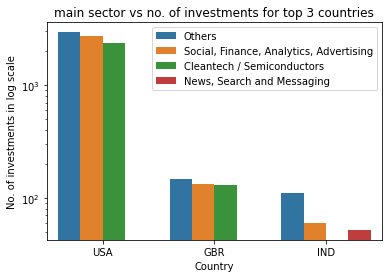

In [75]:
# Plotting results:
sns.barplot(x='Country',y='raised_amount_usd_millions',data=country_sector,hue='main_sector')
plt.yscale('log')
plt.ylabel('No. of investments in log scale')
plt.legend()
plt.title('main sector vs no. of investments for top 3 countries')
plt.show()

# End of checkpoints.
# Below code is for plots used in ppt.

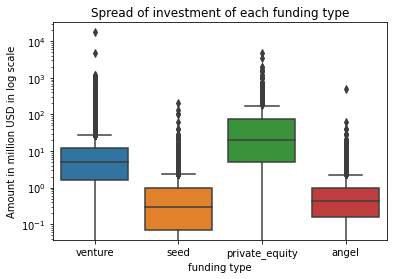

In [76]:
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd_millions', data = master_frame_copy)
plt.yscale('log')
plt.ylabel('Amount in million USD in log scale')
plt.xlabel('funding type')
plt.title('Spread of investment of each funding type')
plt.show()

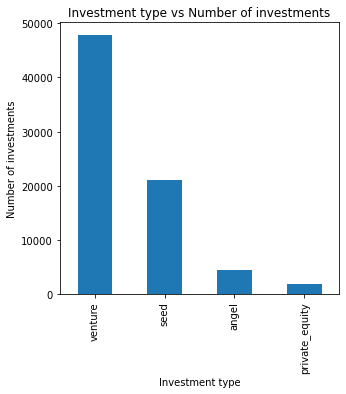

In [77]:
master_frame_copy.funding_round_type.value_counts().plot.bar(figsize=[5,5])
plt.ylabel('Number of investments')
plt.xlabel('Investment type')
plt.title('Investment type vs Number of investments')
plt.show()

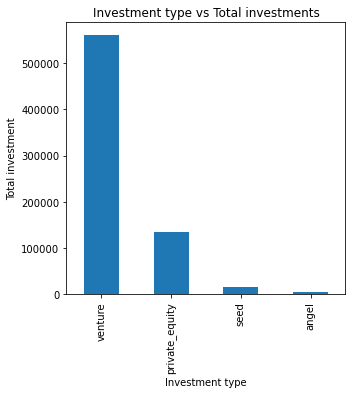

In [78]:
master_frame_copy.groupby('funding_round_type')['raised_amount_usd_millions'].sum().sort_values(ascending=False).plot.bar(figsize=[5,5])
plt.ylabel('Total investment')
plt.xlabel('Investment type')
plt.title('Investment type vs Total investments')
plt.show()